### FY1003 Elektrisitet og Magnetisme - Numerisk Øving 3

Magnetfelt er generelt vanskelig å studere analytisk, hvor analytiske resultater er kjent kun for noen få systemer. Denne øvingen handler om å studere to av disse systemene ved å se på magnetfeltet rundt strømførende ledninger i to forskjellige orienteringer. Den første oppgaven innebærer å diskretisere og utføre et numerisk integral av en endelig ledning parallelt med planet. Den andre oppgaven er valgfri, og omhandler en ledning som står vinkelrett på planet, siden $\nabla \times \vec{B} \neq 0$ vil dette føre til noen numeriske utfordringer mht. retningen på feltlinjene. Det forventes kjennskap til plotting av funksjoner i to dimensjoner, samt bruk av to-dimensjonale arrays i form av meshgrids.

### Oppgave 1: Numerisk Integrasjon

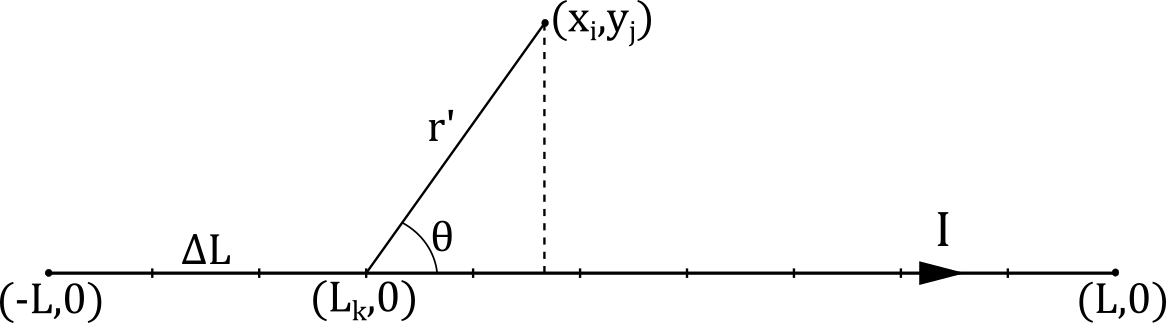

Systemet vi skal se på består av en endelig ledning som går fra $(-L,0)$ til $(L,0)$ der strømmen $I$ har retning mot høyre som vist på figuren. Fra Biot-Savarts lov har vi at magnetfeltet fra en slik ledning er gitt ved
\begin{equation}
\vec{B}(\vec{r}) = \frac{\mu_0I}{4 \pi} \int_{\textit{C}}\frac{\text{d}\vec{l} \times \vec{r}'}{r'^3} \text{,}
\end{equation}
der $\vec{r}':=\vec{r}-\vec{l}$ er en vektor fra et punkt $\vec{l}$ på ledningen til $\vec{r} = (x,y)$. Integralet går over hele ledningen. 

Vi kan skrive ut kryssproduktet som $\text{d}\vec{l}\times\vec{r}' = |\text{d}\vec{l}||\vec{r}'|\sin\theta$, og vi ser fra figuren at $\sin\theta = \frac{y}{|\vec{r}'|}$. I tillegg ligger både $\vec{r'}$ og $\text{d}\vec{l}$ i xy-planet, så magnetfeltet er rettet langs z-aksen. Ved å sette inn alt dette i Biot-Savarts lov, finner vi at styrken på magnetfeltet er gitt ved
\begin{equation}
    B(x,y) = \frac{\mu_0I}{4 \pi} \int_{-L}^{L}\frac{\text{d}x\, y}{|r'|^3}.
\end{equation}

Vi skal nå utføre dette integralet numerisk, ved å skrive det om til en diskret sum over punkter på ledningen. Generellt kan vi dele inn ledningen i $N$ punkter (10 på figuren i og med at vi ikke teller høyre endepunkt) med innbyrdes avstand $\Delta L$. Et punkt på ledningen har da koordinat $(L_k, 0)$, der $L_k \in \{-L, -L+\Delta L, -L+2\Delta L, ... ,L-\Delta L\}$. Videre ser vi fra figuren at $|r'| = \sqrt{(L_k - x_i)^2 + y_j^2}$. Dermed kan integralet vårt skrives som
\begin{equation}
    B(x_i, y_j) = \frac{\mu_0I}{4 \pi} \sum_{k=1}^{N}\frac{\Delta L y_j}{((L_k-x_i)^2 +y_j^2))^{3/2}}
\end{equation}


## a)
Lag en funksjon create_wire som returnerer en array med $N$ punkter fra $-L$ til $L-\Delta L$.

In [2]:
import numpy as np

def create_wire(N, L, dL):
    return np.linspace(-L, L-dL, N)

## b)
Lag en funksjon calc_magneticfield som regner ut det magnetiske feltet for et meshgrid (xi, yj). Denne burde også ha ledningen du laget i a) som input. Magnetfeltet regnes ut ved å utføre den diskrete summen som ble utledet i introduksjonen. 

Tips: Ettersom vi deler på null når $x_i = L_k$ og $y_j = 0$, vil det oppstå numeriske singulariteter langs ledningen. Dette må løses på et fornuftig vis. 

In [3]:
def calc_magneticfield(new_wire, dL, xi, yj):
    
    B = 0
    B_max = 4 #vi må definere en maxverdi vi ønsker for B-feltet, ellers vil plottet se dårlig ut
    x_m, y_m = np.meshgrid(xi, yj) # xm = x-meshgrid, ym = y-meshgrid

    for L_k, i, j in zip(new_wire, x_m, y_m): #fant ut av zip, tenker den fungerer best her
        for x_value, y_value in zip(i, j):    #x_m og y_m er todimensjonale lister så vi må gå over dem igjenn
            if (L_k != x_value) and (y_value != 0):
                B += ((dL*y_m)/((L_k - x_m)**2 + y_m**2)**(3/2))   #siden vi skal normalisere senere, tok jeg ikke med 𝜇_0*I/4pi siden vi ville delt på det uansett senere
            else:
                B += B_max #om vi får en singularitet setter vi bare B-feletet til den maksimale veriden vi har satt vi ønsker, for å hindre at heatplottet blir inkorrrekt / vanskelig å tolke
    
    B = B/N #løste oppgaven veldig rart, siden som konsekvens å gå over ALLE x_m og y_m vil det ta N ganger lengre tid å finne meshgridet samtidig som vår B-verdi blir N ganger større / for stor (i forhold til normalisert)
    
    B[B > B_max] = B_max   #samme om den totale verdien av B blir høyere/lavere en +/-maksen,
    B[B < -B_max] = -B_max #igjenn dette er for å lage ett finere heatplot
    return B

## c) 
Fremstill resultatene i et heatplot. Dere kan f.eks velge $L=1$ og plotte for et område $x,y \in (-2,2)$. Magnetfeltet burde normaliseres (plottes i enhet $\mu_0I/4\pi$).

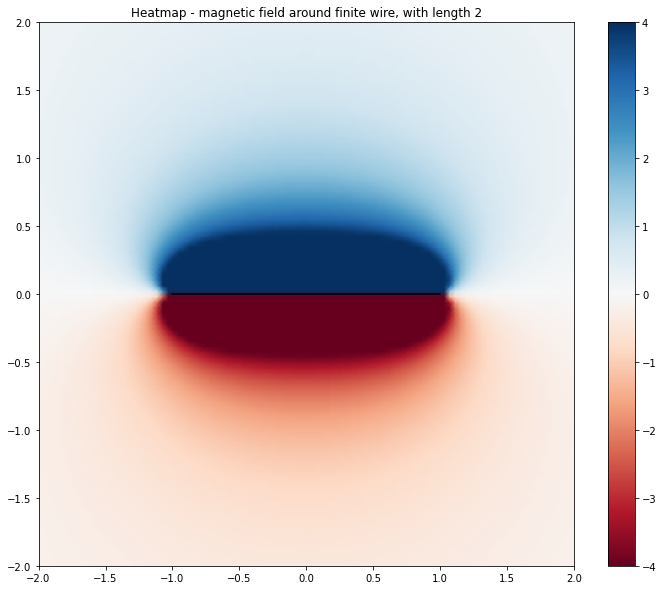

In [15]:
import matplotlib.pyplot as plt

L = 1
N = 100
dL = ((2*L)/N)

xi = np.linspace(-2, 2, N)
yj = np.linspace(-2, 2, N)

new_wire = create_wire(N, L, dL)
B = calc_magneticfield(new_wire, dL, xi, yj)

fig, ax = plt.subplots()
mesh = ax.pcolormesh(xi, yj, B, cmap='RdBu', shading='gouraud')
mesh.figure.set_size_inches(12,10) # med (12,10) ser plottet kvadratisk ut
plt.plot((-L,L),(0,0),color='black')
fig.colorbar(mesh, ax=ax)
plt.title(f'Heatmap - magnetic field around finite wire, with length {2*L}')
plt.show()

### Ekstraoppgave: Ledning vinkelrett på planet

En annen kjent konfigurasjon er en uendelig lang og uendelig tynn ledning orientert vinkelrett på planet med konstant strøm, $I$. Styrken på magnetfeltet vil da være trivielt være $|\vec{B}(\vec{r})| = \frac{\mu_0I}{4 \pi r^2}$, utfordringen med en numerisk formulering av denne situasjonen ligger i å beregne *retningen* magnetfeltet går i. 

$\textbf{a)}$ Plot magnetfeltet rundt en uendelig lang og uendelig tynn strømførende leder som står vinkelrett på planet i origo med konstant strøm, $I$, retning ut av planet.

$\textbf{b)}$ Innfør flere ledninger i systemet, og se på hvordan magnetfeltet varier mht. posisjon og strømretning.